In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import sys, warnings, os
from sklearn.dummy import DummyClassifier

In [2]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
pd.set_option("display.max_columns", None, "display.max_rows", None)

In [4]:
ufc_master = pd.read_csv("C:/Users/decui/%ML_PATH%/handson-ml/datasets/ufs_dataset/ufc-master.csv")

label = ufc_master.Winner

X = ufc_master.drop(['Winner',"B_Women's Featherweight_rank"], axis =1)

In [5]:
X.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,False,Light Heavyweight,MALE,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,Orthodox,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,Orthodox,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,False,Welterweight,MALE,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,Orthodox,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,Orthodox,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,False,Middleweight,MALE,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,Southpaw,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,Orthodox,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,S-DEC,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,False,Lightweight,MALE,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,Orthodox,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,Orthodox,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,KO/TKO,Punch,1.0,1:20,80.0,175.0,90

In [6]:
cat_col = [col for col in X.columns if X[col].dtypes == 'object']
num_col = [col for col in X.columns if col not in cat_col]

In [7]:
enc = LabelEncoder()
for i in X[cat_col]:
    X[i] = enc.fit_transform(X[i].astype(str))

In [8]:
label = [1 if win == 'Red' else 0 for win in label]

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, label, random_state = 2, test_size = 0.3)

In [10]:
X_train.isnull().sum().sort_values(ascending=False)

R_Women's Featherweight_rank    3424
B_Pound-for-Pound_rank          3401
B_Women's Flyweight_rank        3392
B_Women's Strawweight_rank      3385
R_Women's Flyweight_rank        3383
B_Bantamweight_rank             3376
B_Women's Bantamweight_rank     3372
B_Lightweight_rank              3370
B_Light Heavyweight_rank        3365
B_Featherweight_rank            3363
B_Welterweight_rank             3361
B_Flyweight_rank                3357
R_Women's Strawweight_rank      3356
B_Middleweight_rank             3354
B_Heavyweight_rank              3349
R_Women's Bantamweight_rank     3343
R_Featherweight_rank            3336
R_Bantamweight_rank             3336
R_Lightweight_rank              3333
R_Middleweight_rank             3331
R_Heavyweight_rank              3331
R_Light Heavyweight_rank        3330
R_Flyweight_rank                3329
R_Welterweight_rank             3321
R_Pound-for-Pound_rank          3320
B_match_weightclass_rank        2818
R_match_weightclass_rank        2503
b

In [11]:
imp = SimpleImputer(strategy='most_frequent')
imp.fit(X_train[num_col])
X_train[num_col] = imp.transform(X_train[num_col])
X_valid[num_col] = imp.transform(X_valid[num_col])

In [12]:
cat_imp = SimpleImputer(strategy = 'most_frequent')
cat_imp.fit(X_train[cat_col])
X_train[cat_col] = cat_imp.transform(X_train[cat_col])
X_valid[cat_col] = cat_imp.transform(X_valid[cat_col])

In [13]:
X_train.sample(10)

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
2514,536,859,-160.0,140,62.500000,140.000000,357,66,21,False,6,1,3,0,1,0,43.857143,0.358571,1.0,2.142857,0.348571,4,2,17,0,0,1,3,0,1,0,5,1,175.26,195.58,170,0,2,0,37.600,0.438000,0.800000,1.400000,0.338000,2,1,11,0,0,0,0,0,3,1,4,1,180.34,185.42,170,21,23,0,-1,2,1,-1,6,0,-1,-2,-5.08,10.16,-2,6.257143,0.200000,0.742857,0,1,12.0,0.0,2.0,0.0,5.0,0.0,8.0,6.0,0.0,3.0,10.0,10.0,8.0,3.0,4.0,6.0,9.0,15.0,9.0,6.0,10.0,12.0,1.0,7.0,9.0,12.0,4.0,2,1,25,1.0,238,246.0,210.0,205.0,505.0,840.0,350.0,700.0
414,722,321,205.0,-265,205.000000,37.735849,77,66,26,False,11,0,3,0,3,1,4.210000,0.440000,1.3,1.970000,0.460000,3,1,22,0,0,0,3,0,3,0,6,1,162.56,162.56,125,1,0,0,4.180,0.350000,0.500000,0.300000,0.150000,3,4,31,1,0,1,6,0,0,0,7,1,175.26,172.72,125,31,33,-1,3,0,-1,-3,-9,-1,0,3,-12.70,-10.16,2,0.030000,0.800000,1.670000,1,1,4.0,2.0,2.0,0.0,5.0,0.0,8.0,6.0,0.0,3.0,10.0,10.0,8.0,3.0,12.0,4.0,9.0,15.0,9.0,6.0,10.0,12.0,1.0,7.0,9.0,12.0,4.0,1,6,31,3.0,293,900.0,275.0,-135.0,1400.0,425.0,1400.0,900.0
2506,1221,72,-370.0,310,27.027027,310.000000,357,66,21,True,12,0,4,0,0,0,0.000000,0.500000,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,3,160.02,162.56,115,0,0,0,31.000,0.460000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,2,165.10,167.64,115,25,24,0,0,0,0,0,0,0,0,0,-5.08,-5.08,1,0.000000,0.000000,0.000000,0,1,12.0,0.0,2.0,0.0,5.0,0.0,8.0,6.0,0.0,3.0,10.0,10.0,8.0,3.0,4.0,6.0,9.0,15.0,9.0,6.0,10.0,12.0,1.0,7.0,9.0,12.0,4.0,2,5,4,1.0,215,223.0,123.0,541.0,250.0,1000.0,500.0,1000.0
4771,340,995,-210.0,190,47.619048,190.000000,378,22,21,False,7,1,3,0,1,0,29.000000,0.530000,0.0,1.500000,0.500000,1,1,3,0,0,0,0,1,0,0,1,1,190.50,187.96,185,1,0,0,12.000,0.453750,1.125000,1.375000,0.367500,5,2,17,1,0,0,1,0,5,0,6,2,185.42,182.88,170,32,31,1,1,-4,-5,1,-14,-1,1,-5,5.08,5.08,1,17.000000,-1.125000,0.125000,0,1,12.0,0.0,2.0,0.0,5.0,0.0,8.0,6.0,0.0,3.0,10.0,10.0,8.0,3.0,4.0,6.0,9.0,15.0,9.0,6.0,10.0,12.0,1.0,7.0,9.0,12.0,4.0,2,6,31,3.0,292,900.0,300.0,250.0,1000.0,1200.0,350.0,400.0
2837,432,1338,375.0,-470,375.000000,21.276596,47,58,21,False,6,1,3,0,0,0,0.000000,0.500000,0.0,0.000000,0.000000,0,0,0,0,0,0

In [14]:
base_model = DummyClassifier(random_state=2)

In [15]:
base_model.fit(X_train,y_train)

DummyClassifier(random_state=2)

In [16]:
preds = base_model.predict(X_valid)
accuracy_score(y_valid, preds)

0.5867937372362151

In [17]:
ufc_master.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Light Heavyweight,MALE,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,Orthodox,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,Orthodox,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,Orthodox,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,Orthodox,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,MALE,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,Southpaw,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,Orthodox,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,S-DEC,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,Orthodox,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,Orthodox,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [18]:
ufc_master['Winner'] = [1 if winner == 'Red' else 0 for winner in ufc_master.Winner]

In [19]:
num_corr_col = [col for col in ufc_master.columns if ufc_master[col].dtype == 'int64' 
                or ufc_master[col].dtype == 'float64']
corr_dict = {}

for col in num_corr_col:
    corr_dict[col] = abs(ufc_master[col].corr(ufc_master['Winner']))

In [20]:
for w in sorted(corr_dict, key=corr_dict.get):
    print(w, corr_dict[w])

sub_dif 0.00037283719832568774
total_title_bout_dif 0.0008270049633676551
empty_arena 0.0013011392989224838
R_draw 0.00153748005314808
R_win_by_Submission 0.0030767411728053976
B_win_by_Submission 0.0032195197816599777
R_Height_cms 0.003726175398294902
R_Weight_lbs 0.005178227658765241
B_win_by_Decision_Majority 0.005262759654863947
B_longest_win_streak 0.007457733068055386
R_win_by_Decision_Unanimous 0.007927941474568533
B_wins 0.008089265504982146
B_win_by_TKO_Doctor_Stoppage 0.010154524021289968
B_avg_SUB_ATT 0.01292350826967086
B_win_by_Decision_Unanimous 0.01300074661169067
R_Reach_cms 0.01329058775802423
B_avg_TD_pct 0.013953320494844816
B_win_by_KO/TKO 0.014846733185072293
R_win_by_KO/TKO 0.015835641140079335
R_Welterweight_rank 0.016217480197097452
R_wins 0.016525489332201014
B_draw 0.016698809062640065
R_win_by_Decision_Majority 0.016938422768228455
B_current_lose_streak 0.017002765046434127
B_total_rounds_fought 0.01902410865659511
B_Middleweight_rank 0.02011719647445769
B_We

In [21]:
ufc_master['B_odds'].unique()

array([  130,  -200,  -130,   475,   115,  -265,  -720,   135,   225,
         235,   155,   800,  -160,   290,   180,  -310,  -220,  -400,
        -105,  -145,   385,   150,   105,   575,  -125,  -135,   195,
         450,   330,  -115,  -150,   140,   125,   100,   170,   400,
         410,   215,   350,   240,  -170,   120,  -120,  -165,  -320,
        -300,  -110,   230,   190,   270,  -210,  -155,  -350,   175,
         250,   310,   600,  -180,  -275,   435,   245,  -410,  -162,
         580,  -190,  -186,  -235,  -118,   162,   153,   113,   110,
         187,   275,   200,  -139,  -167,   185,   355,  -148,   188,
         160,  -114,   102,  -106,  -177,  -134,  -230,   375,  -215,
         117,   157,   112,   285,   295,   390,  -500,  -147,   145,
         107,   127,  -103,  -112,  -140,  -142,  -152,   210,   205,
         142,   335,   165,   260,   360,  -250,   265,   320,  -245,
        -225,   255,  -185,  -137,   220,   178,   345,   415,   500,
         365,  -240,

In [22]:
(ufc_master['B_odds'].isnull().sum()/ufc_master.shape[0])*100

0.0

In [23]:
ufc_master['Winner'] = ['Red' if winner == 1 else 'Blue' for winner in ufc_master.Winner]

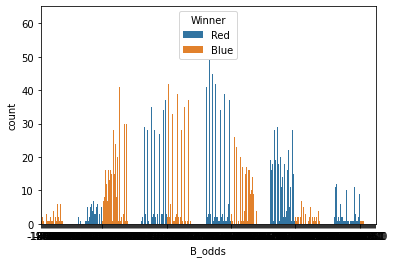

In [24]:
sns.countplot(x=ufc_master['B_odds'], hue = ufc_master['Winner']);

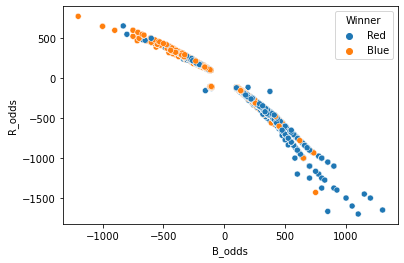

In [25]:
sns.scatterplot(x="B_odds", y="R_odds", hue="Winner", data = ufc_master);

In [26]:
ufc_master["Winner"].loc[ufc_master["B_odds"]>0].value_counts()

Red     2075
Blue     931
Name: Winner, dtype: int64

In [27]:
ufc_master["Winner"].loc[ufc_master["R_odds"]>0].value_counts()

Blue    987
Red     655
Name: Winner, dtype: int64

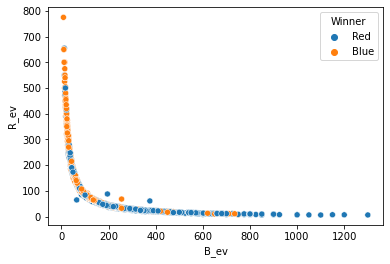

In [28]:
sns.scatterplot(x='B_ev', y='R_ev',hue = 'Winner', data=ufc_master);

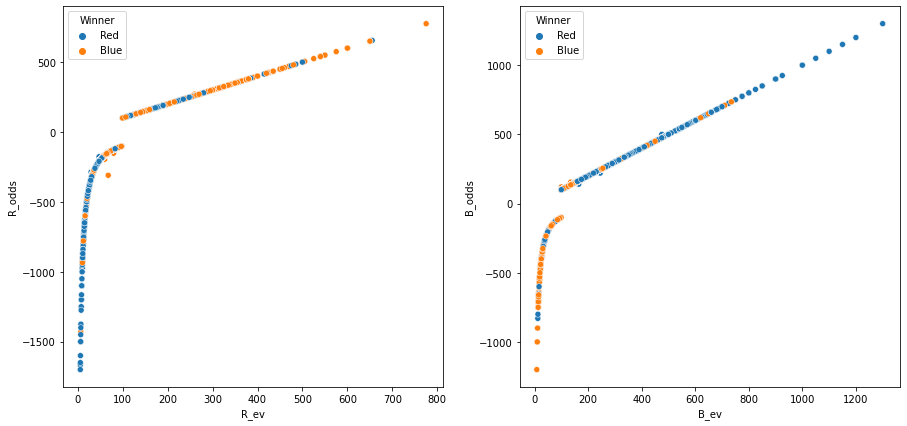

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.scatterplot(x='R_ev', y='R_odds',hue = 'Winner', data=ufc_master, ax=ax[0]);
sns.scatterplot(x='B_ev', y='B_odds',hue = 'Winner', data=ufc_master, ax=ax[1]);
fig.show()

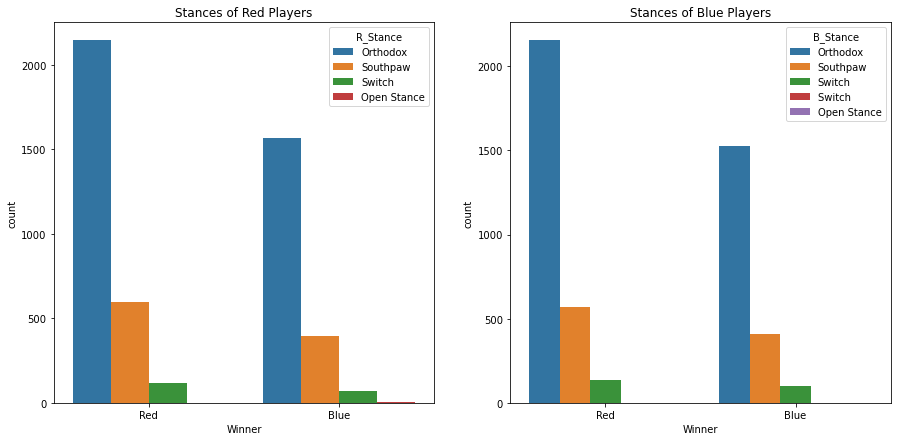

In [30]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.countplot(ufc_master['Winner'], hue = ufc_master['R_Stance'], ax=ax[0])
sns.countplot(ufc_master['Winner'], hue = ufc_master['B_Stance'], ax=ax[1])
ax[0].title.set_text('Stances of Red Players')
ax[1].title.set_text('Stances of Blue Players')
fig.show()

In [31]:
ufc_master.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Light Heavyweight,MALE,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,Orthodox,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,Orthodox,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,Orthodox,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,Orthodox,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,MALE,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,Southpaw,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,Orthodox,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,S-DEC,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,Orthodox,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,Orthodox,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [32]:
ufc_master['draw_diff'] = (ufc_master['B_draw']-ufc_master['R_draw'])
ufc_master['avg_sig_str_pct_diff'] = (ufc_master['B_avg_SIG_STR_pct']-ufc_master['R_avg_SIG_STR_pct'])
ufc_master['avg_TD_pct_diff'] = (ufc_master['B_avg_TD_pct']-ufc_master['R_avg_TD_pct'])
ufc_master['win_by_Decision_Majority_diff'] = (ufc_master['B_win_by_Decision_Majority']-ufc_master['R_win_by_Decision_Majority'])
ufc_master['win_by_Decision_Split_diff'] = (ufc_master['B_win_by_Decision_Split']-ufc_master['R_win_by_Decision_Split'])
ufc_master['win_by_Decision_Unanimous_diff'] = (ufc_master['B_win_by_Decision_Unanimous']-ufc_master['R_win_by_Decision_Unanimous'])
ufc_master['win_by_TKO_Doctor_Stoppage_diff'] = (ufc_master['B_win_by_TKO_Doctor_Stoppage']-ufc_master['R_win_by_TKO_Doctor_Stoppage'])

In [33]:
ufc_master['odds_diff'] = (ufc_master['B_odds']-ufc_master['R_odds'])
ufc_master['ev_diff'] = (ufc_master['B_ev']-ufc_master['R_ev'])


In [34]:
var_drop = [
'B_odds',
'R_odds',
'B_ev',
'R_ev',
'B_current_lose_streak', 'R_current_lose_streak',
'B_current_win_streak', 'R_current_win_streak',
'B_longest_win_streak', 'R_longest_win_streak',
'B_wins', 'R_wins',
'B_losses', 'R_losses',
'B_total_rounds_fought', 'R_total_rounds_fought',
'B_total_title_bouts', 'R_total_title_bouts',
'B_win_by_KO/TKO', 'R_win_by_KO/TKO',
'B_win_by_Submission', 'R_win_by_Submission',
'B_Height_cms', 'R_Height_cms',
'B_Reach_cms', 'R_Reach_cms',
'B_age', 'R_age',
'B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed',
'B_avg_SUB_ATT', 'R_avg_SUB_ATT',
'B_avg_TD_landed', 'R_avg_TD_landed',
'B_draw','B_avg_SIG_STR_pct','B_avg_TD_pct','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous','B_win_by_TKO_Doctor_Stoppage',
'R_draw','R_avg_SIG_STR_pct','R_avg_TD_pct','R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_TKO_Doctor_Stoppage']
ufc_master.drop(var_drop, axis=1, inplace = True)

In [35]:
comm_drop = [
'date','location','country','weight_class','gender','no_of_rounds','empty_arena','constant_1','finish','finish_details','finish_round','finish_round_time','total_fight_time_secs','B_Weight_lbs','R_Weight_lbs'
]
ufc_master.drop(comm_drop, axis=1, inplace = True)

In [36]:
ufc_master.B_Stance.unique()

array(['Orthodox', 'Southpaw', 'Switch', nan, 'Switch ', 'Open Stance'],
      dtype=object)

In [37]:
ufc_master['B_Stance'].loc[ufc_master['B_Stance']=='Switch '] = 'Switch'

In [38]:
stance = ['B_Stance', 'R_Stance']

In [39]:
for x in stance:
    ufc_master[x] = [4 if st == 'Orthodox'
                           else 3 if st == 'Southpaw'
                           else 2 if st == 'Switch'
                           else 1 for st in ufc_master[x]]
    ufc_master['better_rank'] = [-1 if rank == 'Red'
                            else 1 if rank == 'Blue'
                            else 0 for rank in ufc_master['better_rank']]
    ufc_master['title_bout'] = [1 if tb==True else 0 for tb in ufc_master['title_bout']]

In [40]:
ufc_master['Stance_diff'] = (ufc_master['B_Stance'] - ufc_master['R_Stance'])
ufc_master.drop(stance, axis = 1, inplace = True)

In [41]:
ufc_master.head()

,R_fighter,B_fighter,Winner,title_bout,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,draw_diff,avg_sig_str_pct_diff,avg_TD_pct_diff,win_by_Decision_Majority_diff,win_by_Decision_Split_diff,win_by_Decision_Unanimous_diff,win_by_TKO_Doctor_Stoppage_diff,odds_diff,ev_diff,Stance_diff
0,Thiago Santos,Johnny Walker,Red,0,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,10.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,800.0,900.0,2000.0,1600.0,-110.0,175.0,0,0.11,0.64,0,0,-1,0,280.0,63.333333,0
1,Alex Oliveira,Niko Price,Blue,0,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,450.0,350.0,700.0,1100.0,550.0,120.0,0,-0.09,-0.15,0,-1,-3,0,-370.0,-120.000000,0
2,Misha Cirkunov,Krzysztof Jotko,Blue,0,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,550.0,275.0,275.0,1400.0,600.0,185.0,0,-0.08,-0.10,0,2,6,0,-240.0,-33.076923,-1
3,Alexander Hernandez,Mike Breeden,Red,0,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,175.0,900.0,500.0,3500.0,110.0,1100.0,0,-0.02,-0.35,0,0,-2,0,1150.0,460.185185,0
4,Joe Solecki,Jared Gordon,Blue,0,0,-2,-2,1,3,11,0,1,-2,0.00,-5.08,5,2.58,-0.6,-0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,165.0,200.0,400.0,1200.0,900.0,600.0,0,-0.06,-0.13,0,0,2,0,250.0,40.925926,0


In [42]:
ufc_master['Winner'] = [1 if winner == 'Red' else 0 for winner in ufc_master.Winner]

In [43]:
ufc_master.loc[:,'B_match_weightclass_rank':'better_rank'].isnull().sum()

B_match_weightclass_rank        4019
R_match_weightclass_rank        3568
R_Women's Flyweight_rank        4837
R_Women's Featherweight_rank    4889
R_Women's Strawweight_rank      4792
R_Women's Bantamweight_rank     4778
R_Heavyweight_rank              4754
R_Light Heavyweight_rank        4755
R_Middleweight_rank             4762
R_Welterweight_rank             4756
R_Lightweight_rank              4757
R_Featherweight_rank            4763
R_Bantamweight_rank             4759
R_Flyweight_rank                4754
R_Pound-for-Pound_rank          4730
B_Women's Flyweight_rank        4852
B_Women's Featherweight_rank    4896
B_Women's Strawweight_rank      4835
B_Women's Bantamweight_rank     4818
B_Heavyweight_rank              4786
B_Light Heavyweight_rank        4803
B_Middleweight_rank             4794
B_Welterweight_rank             4807
B_Lightweight_rank              4809
B_Featherweight_rank            4806
B_Bantamweight_rank             4811
B_Flyweight_rank                4801
B

In [44]:
ufc_master.drop(ufc_master.loc[:,'B_match_weightclass_rank':'B_Pound-for-Pound_rank'], axis=1, inplace = True)

In [45]:
ufc_master.sample(10)

,R_fighter,B_fighter,Winner,title_bout,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,better_rank,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,draw_diff,avg_sig_str_pct_diff,avg_TD_pct_diff,win_by_Decision_Majority_diff,win_by_Decision_Split_diff,win_by_Decision_Unanimous_diff,win_by_TKO_Doctor_Stoppage_diff,odds_diff,ev_diff,Stance_diff
4286,Pat Barry,Lavar Johnson,0,0,0,0,0,-3,4,-13,0,-2,0,12.70,20.32,-2,45.125000,0.000000,0.000000,0,695.0,1550.0,600.0,1700.0,120.0,170.0,0,0.182500,0.000000,0,0,-1,0,290.0,73.333333,0
2165,Mauricio Rua,Gian Villante,1,0,0,-1,0,-3,4,-19,-3,-2,0,5.08,0.00,4,6.944444,-0.250000,-0.631944,0,350.0,400.0,850.0,1300.0,185.0,275.0,0,-0.028611,0.049375,0,0,-1,0,290.0,70.483871,0
3173,Paddy Holohan,Shane Howell,1,0,0,0,-1,-1,0,-3,0,0,-1,-5.08,0.00,-5,-18.000000,-0.500000,-1.500000,0,375.0,465.0,-120.0,965.0,483.0,855.0,0,-0.455000,-0.250000,0,0,0,0,660.0,286.014493,0
1988,Henry Briones,Rani Yahya,0,0,1,0,3,7,-2,23,0,0,2,-5.08,-5.08,4,-23.916667,0.916667,2.583333,0,330.0,203.0,1825.0,174.0,600.0,1335.0,0,-0.017500,0.350000,0,1,4,0,-420.0,-146.521739,0
622,Ricardo Ramos,Lerone Murphy,0,0,0,-2,-3,-5,-1,-11,0,-1,-1,0.00,2.54,4,-1.180000,1.300000,-2.130000,0,160.0,300.0,300.0,2000.0,850.0,425.0,1,-0.040000,-0.640000,0,-1,-2,0,292.0,68.271605,0
3050,Patrick Cote,Joe Riggs,1,0,-1,0,-3,-3,4,-26,-2,0,1,2.54,-2.54,3,-15.951389,0.097222,0.562500,0,235.0,400.0,800.0,950.0,170.0,600.0,0,0.000764,0.423889,0,-1,-2,1,480.0,181.538462,-1
2290,Ion Cutelaba,Jared Cannonier,0,0,0,0,0,0,0,-4,0,1,0,-5.08,5.08,-10,-38.000000,0.000000,0.000000,0,425.0,525.0,475.0,850.0,140.0,425.0,0,0.390000,0.000000,0,0,-1,0,420.0,146.521739,-1
1877,Damien Brown,Frank Camacho,0,0,1,0,-2,-2,2,-8,0,-1,0,0.00,12.70,4,-23.000000,-0.500000,-0.250000,0,425.0,400.0,475.0,800.0,400.0,200.0,0,NaN,NaN,0,-1,0,0,-230.0,-25.000000,0
1333,Ilir Latifi,Corey Anderson,0,0,0,0,0,1,-1,14,1,-1,-2,12.70,15.24,6,38.700000,-0.300000,3.333333,0,350.0,160.0,700.0,1600.0,180.0,800.0,0,0.040167,0.192000,0,0,4,0,240.0,33.076923,0
894,Veronica Macedo,Polyana Viana,1,0,1,0,1,1,1,-1,0,0,1,2.54,7.62,-4,1.990000,0.500000,0.490000,0,140.0,317.0,715.0,435.0,626.0,1055.0,0,-0.040000,-0.630000,0,0,0,0,240.0,33.076923,1


In [46]:
label = ufc_master.Winner
ufc_master.drop(['Winner'], axis=1, inplace = True)

In [47]:
cat_col = ['R_fighter', 'B_fighter']
enc = LabelEncoder()
for i in ufc_master[cat_col]:
    ufc_master[i] = enc.fit_transform(ufc_master[i])

In [48]:
X_train, X_valid, y_train, y_valid = train_test_split(ufc_master, label, test_size = 0.3, random_state=2)

In [49]:
impute = SimpleImputer(strategy = 'mean')
impute.fit(X_train)
X_train = impute.transform(X_train)
X_valid = impute.transform(X_valid)

In [50]:
RF_model = RandomForestClassifier(random_state=2)
RF_model.fit(X_train, y_train)
preds = RF_model.predict(X_valid)
accuracy_score(y_valid, preds)

0.6364874063989108

In [51]:
RF_model = RandomForestClassifier(n_estimators = 350, max_depth = 12, random_state = 2)
RF_model.fit(X_train, y_train)
preds = RF_model.predict(X_valid)
accuracy_score(y_valid, preds)

0.6487406398910823